In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

num_train = 500 # training set 
num_test = 500 # testing set 

A_std_dev = 20.0 
centerA1=10
centerA2=20

B_std_dev = 20.0
centerB1=30
centerB2=-20


A1 =  [[int(np.random.normal(loc=centerA1,scale=A_std_dev)), int(np.random.normal(loc=centerA2,scale=A_std_dev))] for _ in range(int(num_train/2))]
A2 =  [[int(np.random.normal(loc=centerB1,scale=B_std_dev)), int(np.random.normal(loc=centerB2,scale=B_std_dev))] for _ in range(int(num_train/2))]
A=[*A1,*A2]
    
B1=np.zeros(int(num_train/2))
B2=np.ones(int(num_train/2))
B=[*B1,*B2]

#generate testing set
testing1 =  [[int(np.random.normal(loc=centerA1,scale=A_std_dev)), int(np.random.normal(loc=centerA2,scale=A_std_dev))] for _ in range(int(num_test/2))]
testing2 =  [[int(np.random.normal(loc=centerB1,scale=B_std_dev)), int(np.random.normal(loc=centerB2,scale=B_std_dev))] for _ in range(int(num_test/2))]
testing=[*testing1,*testing2]

In [2]:
testing=np.array(testing)
A=np.array(A)
B=np.array(B)
B = [ int(x) for x in B ]
B=np.array(B)

250


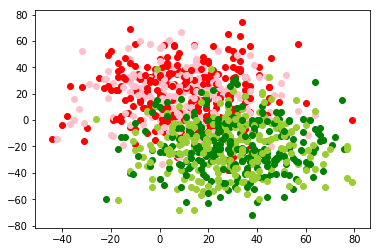

In [3]:
#plot training set and testing set
i=0
while(i<250) :
    plt.scatter(A[i,0],A[i,1], c='red', marker='o')
    plt.scatter(testing[i,0],testing[i,1], c='pink', marker='o')
    i+=1
#plt.scatter(training_B[:,0],training_B[:,1], c='green', marker='o')
print(i)
while(i<500) : 
    plt.scatter(A[i,0],A[i,1], c='green', marker='o')
    plt.scatter(testing[i,0],testing[i,1], c='yellowgreen', marker='o')
    i+=1
#plt.scatter(testing_B[:,0],testing_B[:,1], c='yellowgreen', marker='o')

plt.show()

In [4]:
W=np.random.rand(2,1)
b=np.random.rand(1)


def sigmoid(x):
    return 1 / (1 +np.exp(-x))


def derivative_W(W,A,B) : 
    B=np.transpose(B)
    B_=B.reshape(num_train,1)
    A_=(A[:,0]).reshape(num_train,1)
    A__=(A[:,1]).reshape(num_train,1)
    return np.sum(A_*B)-np.sum((sigmoid(-(np.dot(A,W)))-B_)*A_),np.sum(A__*B)-np.sum((sigmoid(-(np.dot(A,W)))-B_)*A__)
  
def derivative_b(W,A,B) : 
    B=np.transpose(B)
    return np.sum(B)-np.sum(sigmoid(np.dot(A,W)-B))


def error_rate(x,t): # loss function!
    delta=0.0000007 #log무한대 발산방지
    z=np.dot(x,W)+b
    y=sigmoid(z)
    
    return -np.mean(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

def predict(x,t): # calculates accuracy
    z=np.dot(x,W)+b
    y=sigmoid(z)
    #print(y)
    y=np.around(y)
    y=np.array(y)
    k=t.reshape((num_train,1)) 
    a=(y == k).sum()
    #print(a)
    
    return a/num_train*100

In [5]:
learning_rate=1e-2

f=lambda x:loss_func(A,B)

print("Initial error rate=",error_rate(A,B),"Inital W=",W,"\n","b=",b)

print(A.shape)

B=B.reshape(num_train,1)
print(B.shape)
Trainloss=[(0,0)]
Testloss=[(0,0)]
Traina=[(0,0)]
Testa=[(0,0)]
acc=[(0,1)]
c=0
for step in range(8001):
    #W-=learning_rate*derivative(f,W)
    #print(derivative_u(W,A,B))
    #print(derivative_v(W,A,B))
    W[0]-=learning_rate*derivative_W(W,A,B)[0]
    W[1]-=learning_rate*derivative_W(W,A,B)[1]
    b-=learning_rate*derivative_b(W,A,B)
    
    if (step%400==0):
        
        Trainloss += [(round(error_rate(A,B),4),step)]
        Testloss += [(round(error_rate(testing,B),4),step)]
        print("W=",W,"b=",b)
        print("step",step,"iteration",c,"training loss =",error_rate(A,B), "testing loss = ",error_rate(testing,B),"training accuracy =", predict(A,B),"testing accuracy =",predict(testing,B))
        c+=1
        Traina += [(round(predict(A,B),4),step)]
        Testa += [(round(predict(testing,B),4),step)]
   


Initial error rate= 5.741649081322429 Inital W= [[0.87362728]
 [0.13884106]] 
 b= [0.49551512]
(500, 2)
(500, 1)
W= [[-25624.59935774]
 [  -120.50370848]] b= [432.99551512]
step 0 iteration 0 training loss = 8.616688510757124 testing loss =  8.333244786719067 training accuracy = 39.2 testing accuracy = 41.199999999999996
W= [[-10227036.59935772]
 [   -47492.50370849]] b= [173432.99551512]
step 400 iteration 1 training loss = 8.616688510757124 testing loss =  8.333244786719067 training accuracy = 39.2 testing accuracy = 41.199999999999996
W= [[-20428448.59935772]
 [   -94864.50370848]] b= [346432.99551512]
step 800 iteration 2 training loss = 8.616688510757124 testing loss =  8.333244786719067 training accuracy = 39.2 testing accuracy = 41.199999999999996
W= [[-30629860.5993582 ]
 [  -142236.50370848]] b= [519432.99551512]
step 1200 iteration 3 training loss = 8.616688510757124 testing loss =  8.333244786719067 training accuracy = 39.2 testing accuracy = 41.199999999999996
W= [[-4083127

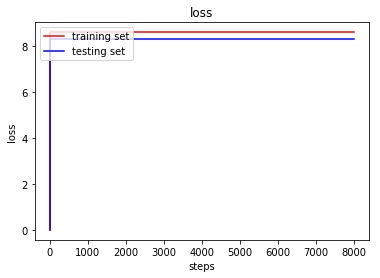

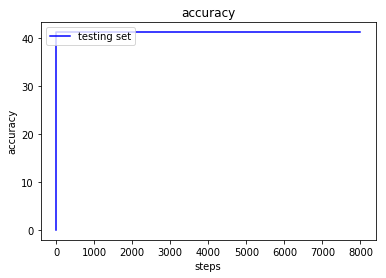

In [10]:
#print(Trainloss)
Trainloss=np.array(Trainloss)
Testloss=np.array(Testloss)
Traina=np.array(Traina)
Testa=np.array(Testa)


plt.title('loss')
plt.xlabel('steps',color='black')
plt.ylabel('loss',color='black')
plt.plot(Trainloss[:,1],Trainloss[:,0],'r',label='training set')
plt.plot(Testloss[:,1],Testloss[:,0],'b',label='testing set')
plt.legend(loc='upper left')
plt.show()

plt.title('accuracy')
plt.xlabel('steps',color='black')
plt.ylabel('accuracy',color='black')
#plt.plot(Traina[:,1],Traina[:,0],'r',label='training set')
plt.plot(Testa[:,1],Testa[:,0],'b',label='testing set')
plt.legend(loc='upper left')
plt.show()